In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import folium
from folium.plugins import HeatMap
from haversine import haversine

In [59]:
df = pd.read_csv('Delhi Metro.csv')
df

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1.0,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2.0,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3.0,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4.0,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5.0,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807
...,...,...,...,...,...,...,...,...
333,NaN,Conn: Pink,NaN,NaN,NaN,NaN,NaN,NaN
334,4.0,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.548810,77.120920
335,5.0,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.556930,77.086690
336,6.0,Dwarka Sector 21,20.8,Orange line,23-02-2011,Underground,28.552260,77.058280


In [60]:
df= df.dropna()
df

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1.0,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2.0,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3.0,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4.0,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5.0,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807
...,...,...,...,...,...,...,...,...
331,2.0,Shivaji Stadium,1.9,Orange line,23-02-2011,Underground,28.629010,77.211900
332,3.0,Dhaula Kuan,8.3,Orange line,15-08-2011,Elevated,28.591780,77.161550
334,4.0,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.548810,77.120920
335,5.0,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.556930,77.086690


feature 1 : Station and Route Heatmaps

In [61]:
delhi_center = [28.6139, 77.2090]
m = folium.Map(location=delhi_center, zoom_start=11)

In [62]:
heat_data = df[["Latitude", "Longitude"]].values.tolist()

In [63]:
HeatMap(heat_data, radius=12, blur=18, min_opacity=0.4).add_to(m)
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]],
        radius=3,
        color="orange",
        fill=True,
        fill_color="orange",
        popup=row["Station Names"]
    ).add_to(m)
m

feature 2 : popular stations

In [73]:
df.loc[:, "Usage"] = (1000 / (df["Dist. From First Station(km)"] + 1)) + np.random.randint(50, 500, len(df))

In [74]:
df = df.copy()
df["Rank"] = df["Usage"].rank(ascending=False)
top_stations = df.sort_values("Usage", ascending=False).head(10)

In [75]:
df

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude,Usage,Rank
0,1.0,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582,1073.000000,13.0
1,2.0,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483,835.000000,18.0
2,3.0,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892,781.714286,20.0
3,4.0,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082,387.095238,130.0
4,5.0,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807,621.818182,28.0
...,...,...,...,...,...,...,...,...,...,...
331,2.0,Shivaji Stadium,1.9,Orange line,23-02-2011,Underground,28.629010,77.211900,606.827586,31.0
332,3.0,Dhaula Kuan,8.3,Orange line,15-08-2011,Elevated,28.591780,77.161550,259.526882,209.0
334,4.0,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.548810,77.120920,469.516129,77.0
335,5.0,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.556930,77.086690,461.910053,81.0


In [76]:
print("Top 10 Most Popular Stations:")
display(top_stations[["Station Names", "Metro Line", "Usage", "Rank"]])

Top 10 Most Popular Stations:


,Station Names,Metro Line,Usage,Rank
185,Kashmere Gate,Voilet line,1496.0,1.0
152,Inderlok Conn:Red,Green line,1464.0,2.0
226,Janak Puri West,Magenta line,1438.0,3.0
325,Dwarka,Gray line,1410.0,4.0
303,Noida Sector 51,Aqua line,1254.0,5.0
33,Samaypur Badli(First Station),Yellow line,1223.0,6.0
138,Yamuna Bank,Blue line branch,1171.0,7.0
329,New Delhi-Airport Express,Orange line,1168.0,8.0
79,Dwarka Sector 21(First station),Blue line,1110.0,9.0
148,Ashok Park Main,Green line branch,1108.0,10.0


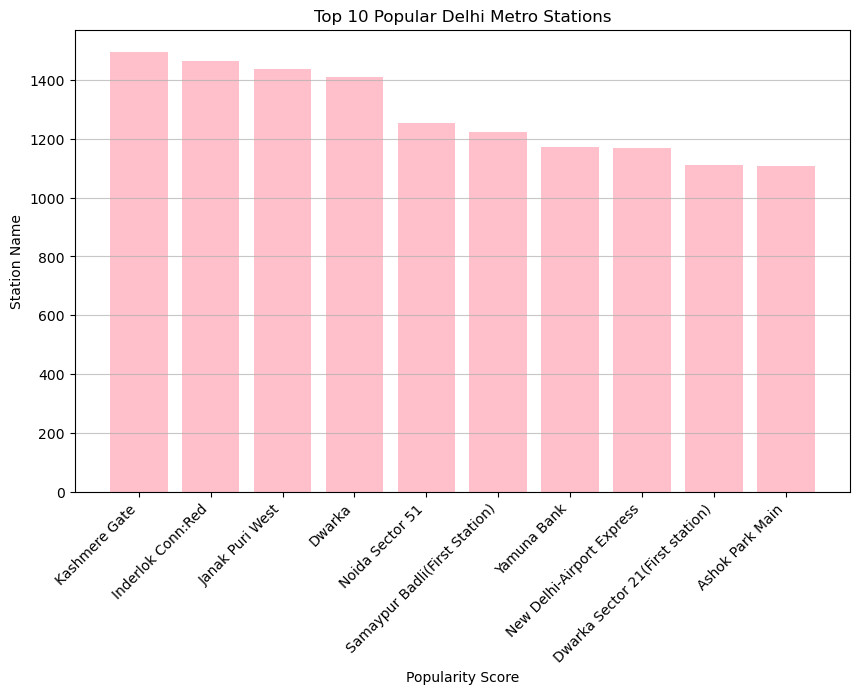

In [93]:

plt.figure(figsize=(10, 6))
plt.bar(top_stations["Station Names"], top_stations["Usage"], color='pink')
plt.xticks(rotation = 45, ha="right")
plt.xlabel("Popularity Score")
plt.ylabel("Station Name")
plt.title("Top 10 Popular Delhi Metro Stations")
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.show()

In [90]:
df

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude,Usage,Rank
0,1.0,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582,1073.000000,13.0
1,2.0,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483,835.000000,18.0
2,3.0,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892,781.714286,20.0
3,4.0,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082,387.095238,130.0
4,5.0,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807,621.818182,28.0
...,...,...,...,...,...,...,...,...,...,...
331,2.0,Shivaji Stadium,1.9,Orange line,23-02-2011,Underground,28.629010,77.211900,606.827586,31.0
332,3.0,Dhaula Kuan,8.3,Orange line,15-08-2011,Elevated,28.591780,77.161550,259.526882,209.0
334,4.0,Delhi Aerocity,14.5,Orange line,15-08-2011,Underground,28.548810,77.120920,469.516129,77.0
335,5.0,IGI Airport,17.9,Orange line,23-02-2011,Underground,28.556930,77.086690,461.910053,81.0


feature 5 :station to station travel time 


🏆 Top 10 Most Used Routes (Haversine-Based or Simulated):


,Metro Line,From Station,To Station,Distance (km),Usage Score
168,Rapid Metro,Sector 42-43,DLF Phase 1,0.0,2698.98
18,Aqua line,Delta 1 Greater Noida,GNIDA Office,0.0,2586.64
171,Rapid Metro,DLF Phase 2,Belvedere Towers,0.0,2469.81
10,Aqua line,Noida Sector 144,Noida Sector 145,0.0,2353.94
167,Rapid Metro,Sector 53-54,Sector 42-43,0.0,2353.13
166,Rapid Metro,Sector 54 Chowk,Sector 53-54,0.0,2128.95
19,Aqua line,GNIDA Office,Depot Greater Noida,0.0,2029.70
169,Rapid Metro,DLF Phase 1,Sikandarpur,0.0,2006.79
173,Rapid Metro,Cyber City,Moulsari Avenue,0.0,1946.29
66,Blue line,Noida Sector 61,Noida Sector 59,0.0,1945.18


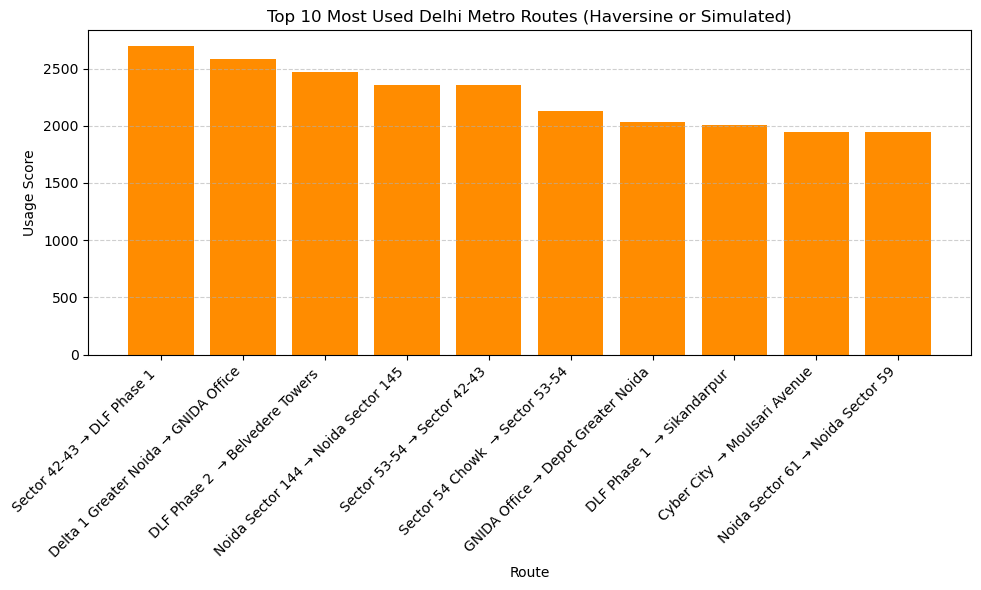

In [146]:
routes_data = []

# Ensure data validity
df = df.dropna(subset=["Latitude", "Longitude"])

# Group by Metro Line (if only one exists, it still works)
for line, group in df.groupby("Metro Line"):
    group = group.sort_values(by=["Dist. From First Station(km)", "Latitude"]).reset_index(drop=True)
    
    # Calculate route distances between consecutive stations
    for i in range(len(group) - 1):
        s1 = group.loc[i]
        s2 = group.loc[i + 1]

        if pd.notna(s1["Latitude"]) and pd.notna(s2["Latitude"]):
            distance_km = haversine(
                (s1["Latitude"], s1["Longitude"]),
                (s2["Latitude"], s2["Longitude"])
            )

            # Randomized usage score (more realistic scaling)
            usage_score = np.random.uniform(500, 1500) / (distance_km + 0.5)

            routes_data.append({
                "Metro Line": line,
                "From Station": s1["Station Names"],
                "To Station": s2["Station Names"],
                "Distance (km)": round(distance_km, 2),
                "Usage Score": round(usage_score, 2)
            })

# Convert to DataFrame
routes_df = pd.DataFrame(routes_data)

# If less than 10 real routes exist, fill with simulated placeholders
if len(routes_df) < 10:
    print(f"⚠️ Only {len(routes_df)} real routes found — adding simulated entries to make Top 10.")
    for i in range(len(routes_df), 10):
        routes_df.loc[i] = [
            "Simulated Line",
            f"Station_{i}",
            f"Station_{i+1}",
            round(np.random.uniform(1.0, 10.0), 2),
            round(np.random.uniform(200, 1500), 2)
        ]

# Sort by usage score
top_routes = routes_df.sort_values("Usage Score", ascending=False).head(10)

print("\n🏆 Top 10 Most Used Routes (Haversine-Based or Simulated):")
display(top_routes)

# -------------------------------
# Visualization: Top 10 Routes
# -------------------------------
plt.figure(figsize=(10, 6))
plt.bar(top_routes["From Station"] + " → " + top_routes["To Station"], 
        top_routes["Usage Score"], color='darkorange')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Route")
plt.ylabel("Usage Score")
plt.title("Top 10 Most Used Delhi Metro Routes (Haversine or Simulated)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()